In [1]:
# use "squidpy" environment!

import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import squidpy as sq

In [2]:
df=pd.read_csv('./MNN_simple_res0.8/3_nico_annotation_cluster.csv')
cluster=df.to_numpy()
df=pd.read_csv('./MNN_simple_res0.8/3_nico_annotation_ct_name.csv')
ctname=df.to_numpy()

In [3]:
adata= sc.read_h5ad('./inputQuery/sct_spatial.h5ad')
adata

AnnData object with n_obs × n_vars = 27452 × 468
    obs: 'n_counts', 'leiden0.3', 'leiden0.4', 'leiden0.5', 'leiden0.2', 'leiden0.1', 'leiden0.6', 'leiden0.7', 'leiden0.8', 'leiden1.0', 'leiden0.9'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'dendrogram_leiden1.0', 'leiden', 'leiden0.3_colors', 'leiden1.0_colors', 'neighbors', 'pca', 'pearson_residuals_normalization', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:
np.array_equal(adata.obs_names, cluster[:,0])

True

In [5]:
d={}
for i in range(len(ctname)):
    d[ctname[i,0]]=ctname[i,1]

ct=[]
for i in range(len(cluster)):
    ct.append(d[cluster[i,1]])

In [6]:
adata.obs['nico_cluster']=ct 

In [7]:
adata.obs['nico_cluster']

aaahdpab-1        CM_General2
aaaiihpl-1        CM_General2
aaakmjih-1        CM_General2
aaalclhf-1        CM_General2
aabbkkne-1       EC_capillary
                   ...       
ojdkebci-1          Pericytes
ojecgcba-1    vEC_Endocardial
ojecpbkj-1       EC_capillary
ojehfdpd-1         Neutrophil
ojeickfn-1       EC_capillary
Name: nico_cluster, Length: 27452, dtype: object

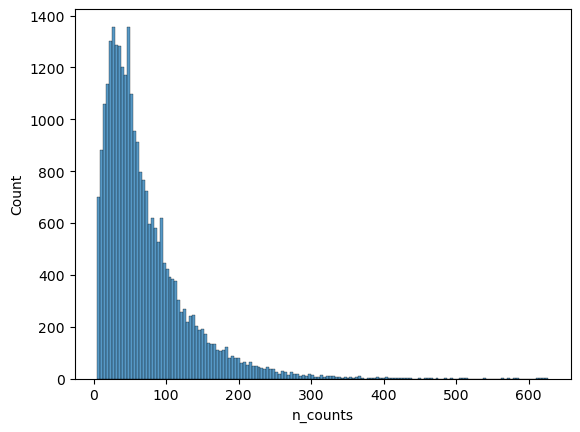

In [8]:
hist = sns.histplot(adata.obs["n_counts"], kde=False)
hist.figure.savefig("counts_hist.pdf")

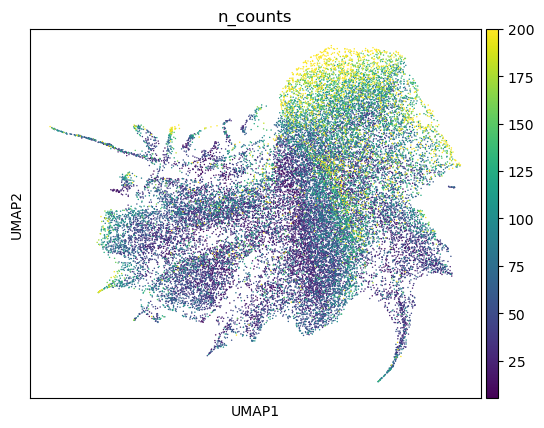

In [9]:
sc.pl.umap(adata, color=["n_counts"], wspace=0.4, vmax=200, save='_n_count_spatial_umap.png')

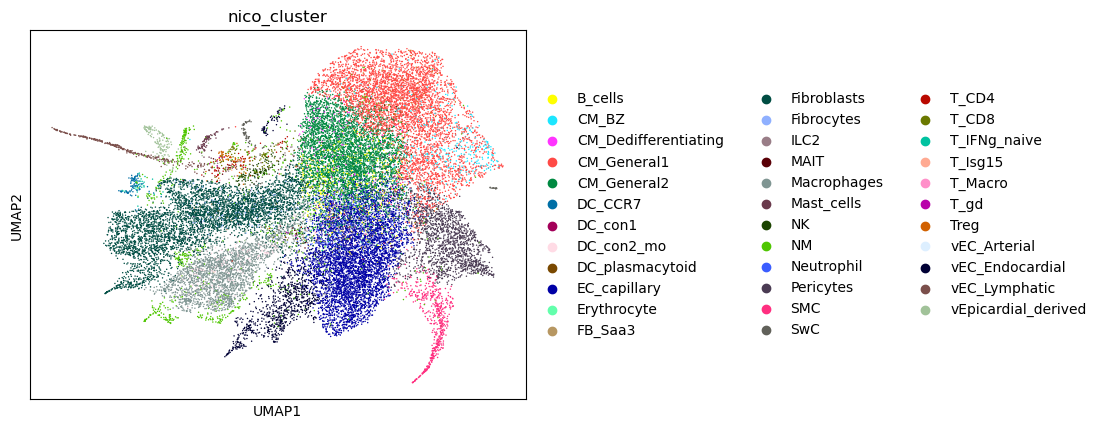

In [10]:
sc.pl.umap(adata, color=["nico_cluster"], wspace=0.4,show=True, save='leiden_simple.png')

In [15]:
from matplotlib import rcParams

/Users/andychan/miniconda3/envs/squidpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


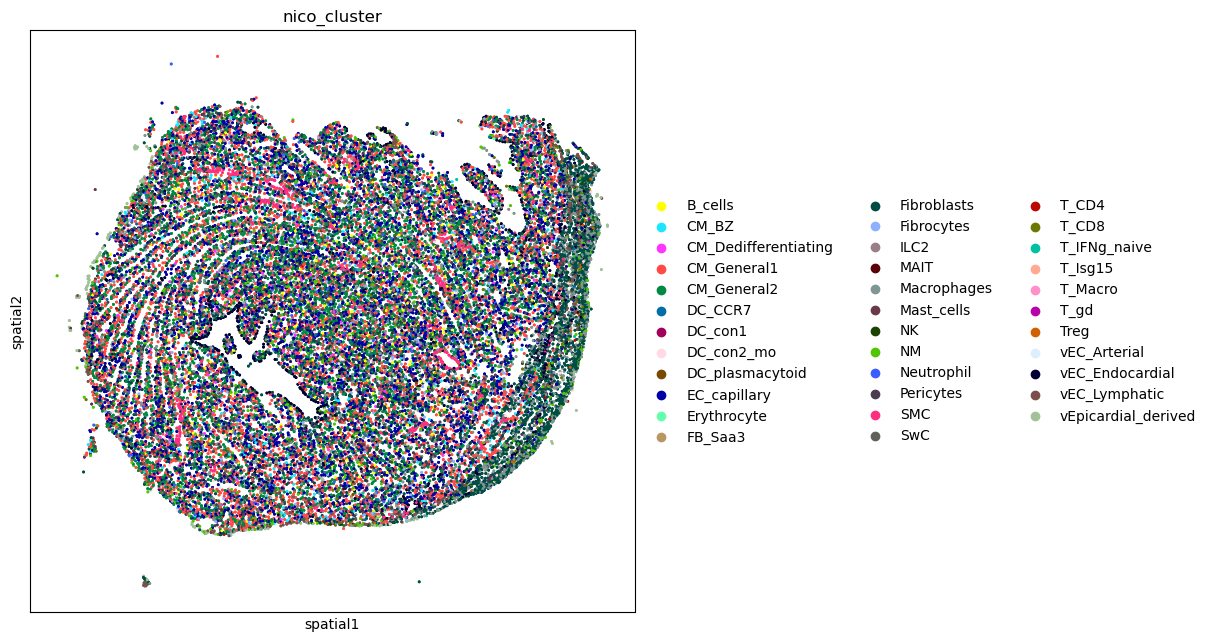

In [20]:
rcParams["figure.figsize"] = (12, 12)
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "nico_cluster",
    ],
    wspace=0.4, save = 'spatial_nico_ann.png'
)

/Users/andychan/miniconda3/envs/squidpy/lib/python3.11/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


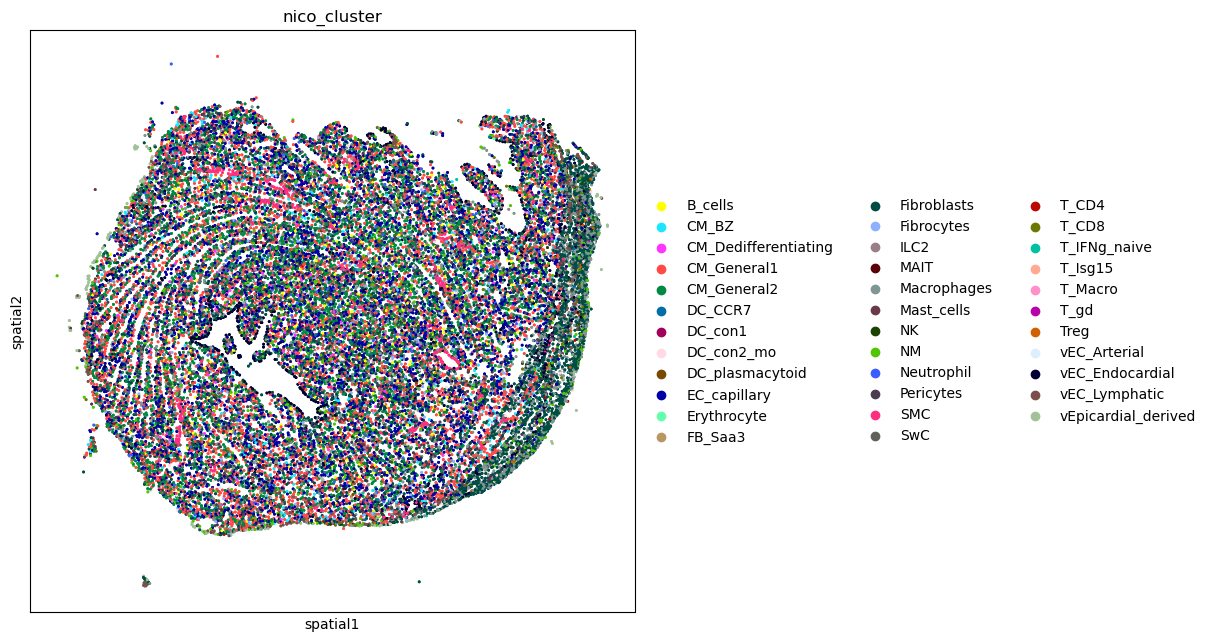

In [21]:
# save as pdf
rcParams["figure.figsize"] = (12, 12)
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "nico_cluster",
    ],
    wspace=0.4, save = 'spatial_nico_ann.pdf'
)

In [ ]:
sc.tl.rank_genes_groups(adata, 'nico_cluster', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, show=True, save='_t-test_simple.pdf')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4,
                                values_to_plot='logfoldchanges',
                                save='_logFC_simple.pdf'
                               )